In [70]:
import matplotlib.image as img
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from skimage.metrics import structural_similarity as ssim

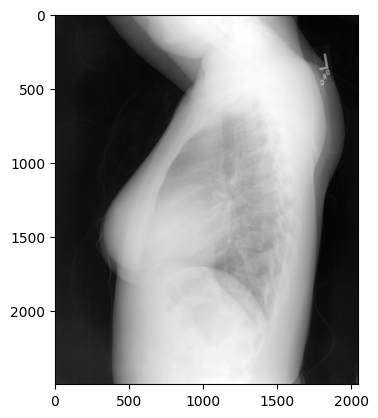

In [23]:
img = cv2.imread("D:/data/iuct/images/images_normalized/1_IM-0001-3001.dcm.png")
plt.imshow(img)

[[83 69 58 ... 26 27 26]
 [68 57 47 ... 24 25 25]
 [56 47 40 ... 23 23 23]
 ...
 [50 49 49 ... 59 52 47]
 [48 48 49 ... 57 51 47]
 [48 48 49 ... 52 49 47]]
[[83. 69. 58. ... 26. 27. 26.]
 [68. 57. 47. ... 24. 25. 25.]
 [56. 47. 40. ... 23. 23. 23.]
 ...
 [50. 49. 49. ... 59. 52. 47.]
 [48. 48. 49. ... 57. 51. 47.]
 [48. 48. 49. ... 52. 49. 47.]]


C:\Users\User\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


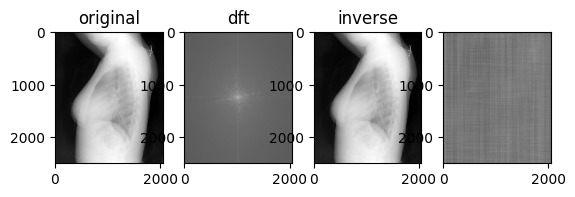

SSIM: 1.0000000000000648


In [71]:

img = cv2.imread("D:/data/iuct/images/images_normalized/1_IM-0001-3001.dcm.png",0)


f= np.fft.fft2(img)
fshift = np.fft.fftshift(f)
out = 20*np.log(np.abs(fshift))

inverse_shift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(inverse_shift)
out2 = np.abs(img_back)
# inverse_dft = cv2.dft(inverse_shift, flags=cv2.DFT_INVERSE)
# out2 = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1])

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('original')
plt.subplot(1,4,2)
plt.imshow(out, cmap='gray')
plt.title('dft')
plt.subplot(1,4,3)
plt.imshow(out2, cmap='gray')
plt.title('inverse')
plt.subplot(1,4,4)
plt.imshow(img-out2, cmap='gray')
plt.title(' ')

print(img)
print(out2)

(score, diff) = ssim(img, out2, full=True)
plt.show()
print("SSIM: {}".format(score))

[[83 69 58 ... 26 27 26]
 [68 57 47 ... 24 25 25]
 [56 47 40 ... 23 23 23]
 ...
 [50 49 49 ... 59 52 47]
 [48 48 49 ... 57 51 47]
 [48 48 49 ... 52 49 47]]
[[30 30 30 ... 22 22 22]
 [30 30 30 ... 22 22 22]
 [30 30 30 ... 22 22 22]
 ...
 [46 46 46 ... 62 62 62]
 [46 46 46 ... 62 62 62]
 [46 46 46 ... 62 62 62]]


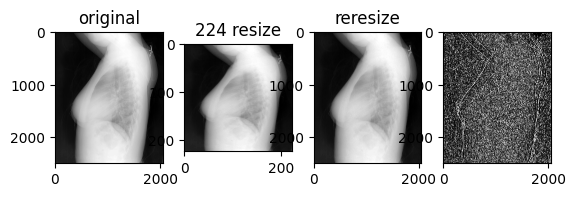

SSIM: 0.9662778396954662


In [72]:
img = cv2.imread("D:/data/iuct/images/images_normalized/1_IM-0001-3001.dcm.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape

dst1 = cv2.resize(gray,(224,224))
dst2 = cv2.resize(dst1,(width,height))

plt.subplot(1,4,1)
plt.imshow(gray, cmap='gray')
plt.title('original')
plt.subplot(1,4,2)
plt.imshow(dst1, cmap='gray')
plt.title('224 resize')
plt.subplot(1,4,3)
plt.imshow(dst2, cmap='gray')
plt.title('reresize')
plt.subplot(1,4,4)
plt.imshow(gray-dst2, cmap='gray')
plt.title(' ')
print(gray)
print(dst2)

plt.show()

(score, diff) = ssim(gray, dst2, full=True)
plt.show()
print("SSIM: {}".format(score))

In [80]:
import torch
import numpy as np
x=torch.rand(1,2,3)
y = torch.rand(1,3)

print(x)
print(y)
print(np.concatenate(x,y))

tensor([[[0.7924, 0.3239, 0.4761],
         [0.8217, 0.7055, 0.2857]]])
tensor([[0.5247, 0.7821, 0.8079]])


TypeError: only integer tensors of a single element can be converted to an index